<a href="https://colab.research.google.com/github/rupakkumar-76319/XOR_Classification-using-ML/blob/main/XOR_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : XOR Classification**

---
**Goal Of the Project :** See dead ReLU, Overfitting, regularization, and fixes my own eyes.

---
In my opinion, **ReLU** is too heavy if I am only trying to solve with theory.
That's Why I am going to making the small project on the ReLU.




In [ ]:
import torch
print(torch.__version__)

2.9.0+cpu


**PyTorch** is a Python library used to build and train neural networks using tensors and automatic differentiation.

-- Torch is the main PyTorch package.

like this..

torch = PyTorch toolbox

In [ ]:
import torch
x= torch.tensor(2.0, requires_grad=True)
print(x)
y=x**2
print(y)
y.backward()
print(y)
print(x.grad)

tensor(2., requires_grad=True)
tensor(4., grad_fn=<PowBackward0>)
tensor(4., grad_fn=<PowBackward0>)
tensor(4.)


**Tensor** : A number (or any array of numbers) that PyTorch can do math on and compute gradient for.


*   Scaler ---> Tensor
*   Vector ---> Tensor
*   Matrix ---> Tensor

y.backward(): Compute the derivatives of y with respect to all variable that were marked required_gradient=True.


In [ ]:
import torch
x= torch.tensor(2.0, requires_grad=True)
y=3*x
print(x)
print(y)
y.backward()
print(y)
print(x.grad)
print(x)

tensor(2., requires_grad=True)
tensor(6., grad_fn=<MulBackward0>)
tensor(6., grad_fn=<MulBackward0>)
tensor(3.)
tensor(2., requires_grad=True)


*  Here, backward() helps to find the derivative of y w.r.t all variable that were marked the requires_grad=True.

And it store in the x.grad that's why when anybody see the output, they realize.



## ReLU: Rectified Linear Unit

y= max(0, x)



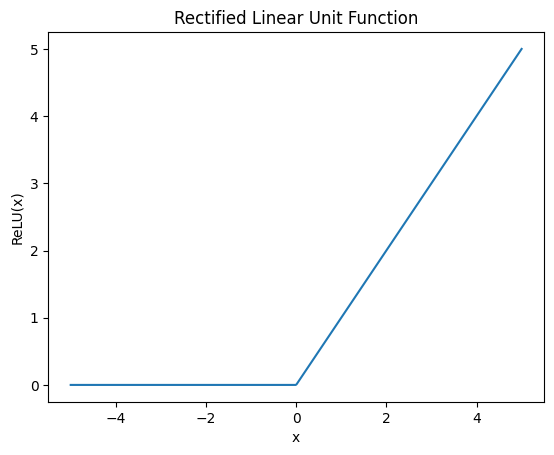

x= tensor(-5., requires_grad=True)
y=  tensor(0., grad_fn=<ReluBackward0>)
x.grad=  tensor(0.)
x=-5.0, ReLU(x)= 0.0, gradient (x.grad) = 0.0
x= tensor(5., requires_grad=True)
y=  tensor(5., grad_fn=<ReluBackward0>)
x.grad=  tensor(1.)
x=5.0, ReLU(x)= 5.0, gradient (x.grad) = 1.0


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ReLU Function
x_vals=np.linspace(-5,5,500)
relu_vals=np.maximum(0,x_vals)

# Plot ReLU Graph
plt.figure()
plt.plot(x_vals,relu_vals)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Rectified Linear Unit Function')
plt.show()

test_points=[-5.0,5.0]

for val in test_points:
  x = torch.tensor(val,requires_grad=True)
  y= torch.relu(x)
  y.backward()
  print("x=",x)
  print("y= ",y)
  print("x.grad= ",x.grad)
  print(f"x={val}, ReLU(x)= {y.item()}, gradient (x.grad) = {x.grad.item()}")

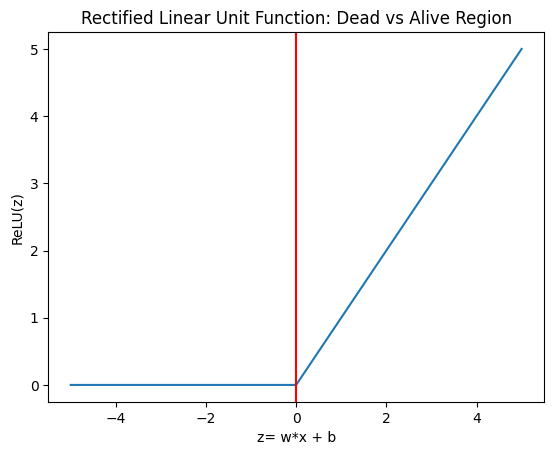

Neuron values
z = -3.0
y = 0.0
w.grad = 0.0
b.grad = 0.0


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

z_vals= np.linspace(-5,5,500)
relu_vars=np.maximum(0, z_vals)

plt.figure()
plt.plot(z_vals, relu_vars)
plt.axvline(0, color='r')
plt.xlabel('z= w*x + b')
plt.ylabel('ReLU(z)')
plt.title('Rectified Linear Unit Function: Dead vs Alive Region')
plt.show()

x= torch.tensor(1.0)
w= torch.tensor(-2.0, requires_grad=True)
b= torch.tensor(-1.0, requires_grad=True)
z= w*x+b
y= torch.relu(z)
y.backward()

print("Neuron values")
print("z =", z.item())
print("y =", y.item())
print("w.grad =", w.grad.item())
print("b.grad =", b.grad.item())

**Block Diagram**

x ------->  (w,b) ----> Z ----> ReLU ----> y

                                 |
                                 |
                                 ▼

                        if z<0 ---> gradient =0

-- 0nce here:
         
*   No gradient
*   No weight update
*   Neuron stay dead

After the dead neuron, **ReLU is failed**
So, for the **Survive** of the dead neurons, We introduce **Leaky ReLU**.



## Leaky ReLU

Instead of killing everything for z < 0, Leaky ReLU allows a small slope.

   Leaky ReLU(z) = z, if z>0 ...
                   αz, if z<0
                   
-- ****α is small (usually 0.01)****



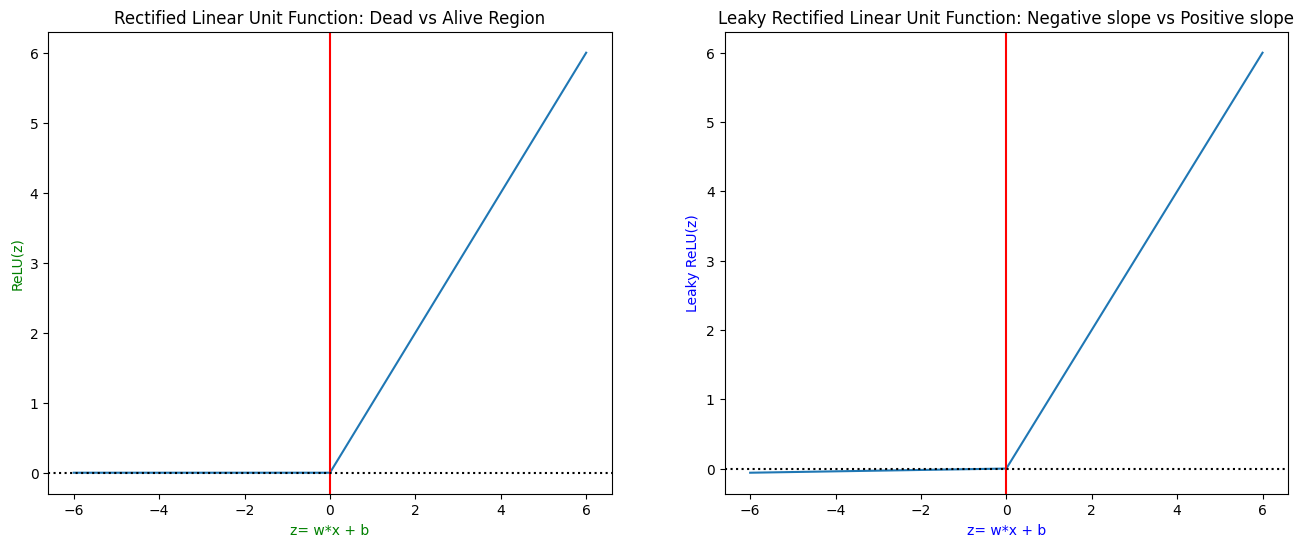

z=  -5.0
y=  -0.04999999701976776
w grad:  None
b grad:  None
w grad:  tensor(0.0100)
b grad:  tensor(0.0100)


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

z_vars= np.linspace(-6,6,500)
relu_vars= np.maximum(0,z_vars)
leaky_relu_vars= np.maximum(0.01*z_vars, z_vars)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(z_vars, relu_vars)
axes[0].axvline(0, color='r')
axes[0].axhline(0, color='black', linestyle= 'dotted')
axes[0].set_xlabel('z= w*x + b', color='g')
axes[0].set_ylabel('ReLU(z)', color='g')
axes[0].set_title('Rectified Linear Unit Function: Dead vs Alive Region')

axes[1].plot(z_vars, leaky_relu_vars)
axes[1].axvline(0, color='r')
axes[1].axhline(0, color='black', linestyle= 'dotted')
axes[1].set_xlabel('z= w*x + b', color='b')
axes[1].set_ylabel('Leaky ReLU(z)', color='b')
axes[1].set_title('Leaky Rectified Linear Unit Function: Negative slope vs Positive slope')

plt.show()

x= torch.tensor(1.0)
w= torch.tensor(-3.0, requires_grad= True)
b= torch.tensor(-2.0, requires_grad=True)

z= w*x + b
y= torch.nn.functional.leaky_relu(z, negative_slope= 0.01)

print("z= ", z.item())
print("y= ", y.item())

print("w grad: ", w.grad)
print("b grad: ", b.grad)

y.backward()

print("w grad: ", w.grad)
print("b grad: ", b.grad)

**In above two figure, We see that**

-- Neuron is dead in negative side. If it's happen then our whole gradient
is zero.

-- At this situation, ReLU function is not working.

-- Then introduce the **Leaky ReLU** for solving the issue.

**Graph intuition**

*   ReLU → flat line on left → dead
*   Leaky ReLU → small slope on left → alive

That tiny slope is everything.

***Leaky ReLU prevents dead neurons by allowing gradient flow for negative inputs.***

## Batch Normalization

x ---> w,b ---> z(-5) ---> normalize(~0) ---> ReLU ---> Alive

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1.0],
                  [2.0],
                  [3.0]], dtype=torch.float32)


linear= nn.Linear(1, 1, bias= True)
bn= nn.BatchNorm1d(1)
relu= nn.ReLU()

z= linear(x)
z_bn= bn(z)
y= relu(z_bn)

print("x shape:", x.shape)
print("z shape:", z.shape)
print("z_bn shape:", z_bn.shape)
print("y shape:", y.shape)


print("z before BN:\n", z)
print("z after BN:\n", z_bn)

print("y= ",y)

x shape: torch.Size([3, 1])
z shape: torch.Size([3, 1])
z_bn shape: torch.Size([3, 1])
y shape: torch.Size([3, 1])
z before BN:
 tensor([[0.4713],
        [1.4609],
        [2.4506]], grad_fn=<AddmmBackward0>)
z after BN:
 tensor([[-1.2247e+00],
        [ 1.3153e-07],
        [ 1.2247e+00]], grad_fn=<NativeBatchNormBackward0>)
y=  tensor([[0.0000e+00],
        [1.3153e-07],
        [1.2247e+00]], grad_fn=<ReluBackward0>)


x shape: torch.Size([3, 1])
z shape: torch.Size([3, 1])
z_bn shape: torch.Size([3, 1])
y shape: torch.Size([3, 1])

z before BN:
 tensor([[-1.4527],
        [-2.0615],
        [-2.6702]], grad_fn=<AddmmBackward0>)

z after BN:
 tensor([[ 1.2247e+00],
        [-1.5109e-07],
        [-1.2247e+00]], grad_fn=<NativeBatchNormBackward0>)

y after ReLU:
 tensor([[1.2247],
        [0.0000],
        [0.0000]], grad_fn=<ReluBackward0>)


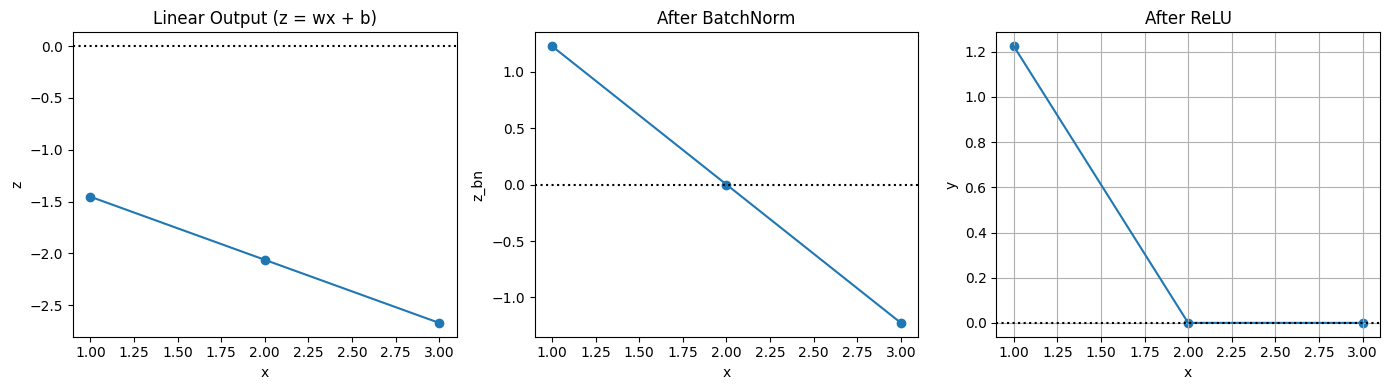

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

x = torch.tensor([[1.0],
                  [2.0],
                  [3.0]], dtype=torch.float32)

linear = nn.Linear(1, 1, bias=True)
bn = nn.BatchNorm1d(1)
relu = nn.ReLU()

z = linear(x)
z_bn = bn(z)
y = relu(z_bn)

print("x shape:", x.shape)
print("z shape:", z.shape)
print("z_bn shape:", z_bn.shape)
print("y shape:", y.shape)

print("\nz before BN:\n", z)
print("\nz after BN:\n", z_bn)
print("\ny after ReLU:\n", y)

x_np = x.detach().numpy().flatten()
z_np = z.detach().numpy().flatten()
z_bn_np = z_bn.detach().numpy().flatten()
y_np = y.detach().numpy().flatten()

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(x_np, z_np)
plt.plot(x_np, z_np)
plt.title("Linear Output (z = wx + b)")
plt.xlabel("x")
plt.ylabel("z")
plt.axhline(0, color='black', linestyle='dotted')

plt.subplot(1, 3, 2)
plt.scatter(x_np, z_bn_np)
plt.plot(x_np, z_bn_np)
plt.title("After BatchNorm")
plt.xlabel("x")
plt.ylabel("z_bn")
plt.axhline(0, color='black', linestyle='dotted')

plt.subplot(1, 3, 3)
plt.scatter(x_np, y_np)
plt.plot(x_np, y_np)
plt.title("After ReLU")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linestyle='dotted')

plt.tight_layout()
plt.grid(True)
plt.show()



## Why XOR FAILS with a single linear layer

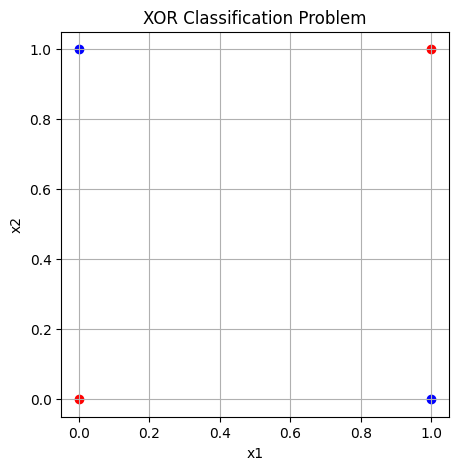

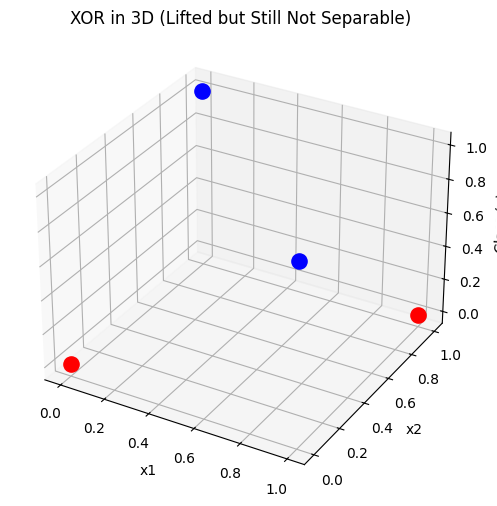

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

x= np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y= np.array([0,1,1,0])

plt.figure(figsize=(5,5))
for i in range(len(x)):
  if y[i]==0:
    plt.scatter(x[i][0], x[i][1], color='red')
  else:
    plt.scatter(x[i][0], x[i][1], color='blue')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Classification Problem")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(x)):
    if y[i] == 0:
        ax.scatter(x[i][0], x[i][1], y[i], color='red', s=120)
    else:
        ax.scatter(x[i][0], x[i][1], y[i], color='blue', s=120)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Class (y)")
ax.set_title("XOR in 3D (Lifted but Still Not Separable)")

plt.show()




*   XOR is NOT linearly separable.
A single linear layer computes:

        y=w1x1+w2x2+b

**ONE straight decision boundary**.

No matter how you choose:

-- weights

-- bias

-- learning rate

-- optimizer

👉 One line cannot solve XOR

This is not a PyTorch problem
This is geometry


---
**To Solve XOR, We need**

*   Hidden Layer
*   Non-linearity (ReLU, Tanh, etc.)

Because

*   First layer bends the space
*   Second layer separates it




###**Makes Model for XOR (Hidden Layer)**

SO Model is like that:

**XOR** = (x1 **OR** x2) **AND NOT** (x1 **AND** x2)

-- It gives two hidden layers.

****Remember****

-- Output is fixed. This is never change.

*   Hidden layer does NOT compute XOR.
*   Hidden layer computes intermediate features that make XOR linearly separable.





OR: [0 1 1 1]
AND: [0 0 0 1]
NOT of X4:  [1 1 1 0]
XOR:  [0 1 1 0]


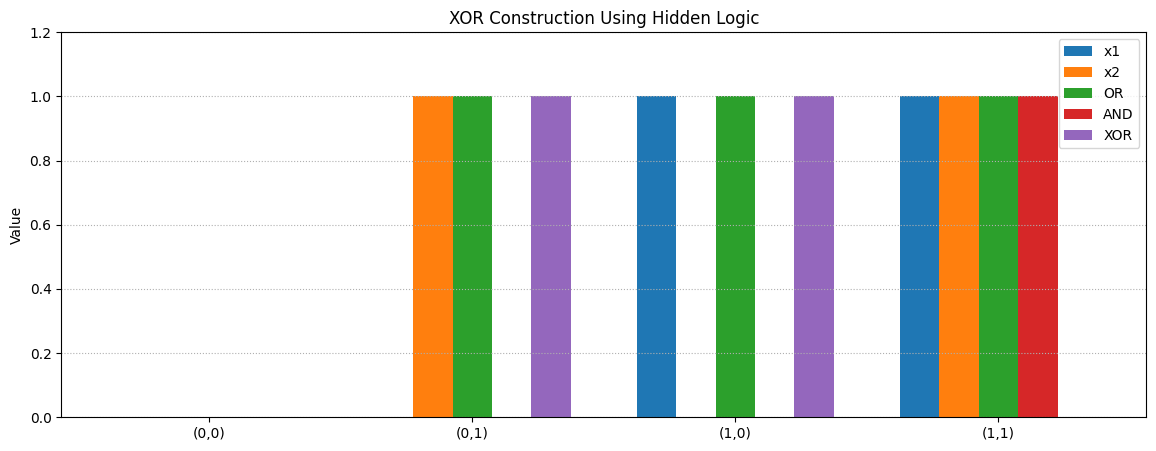

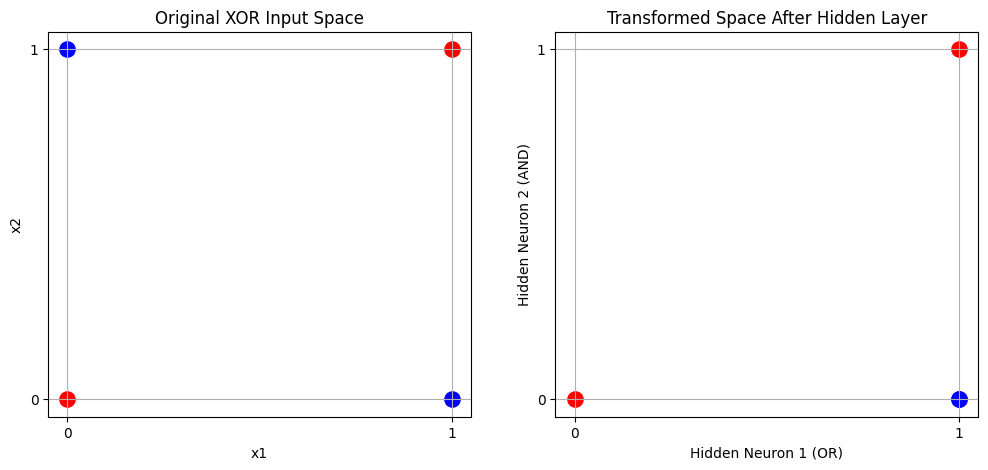

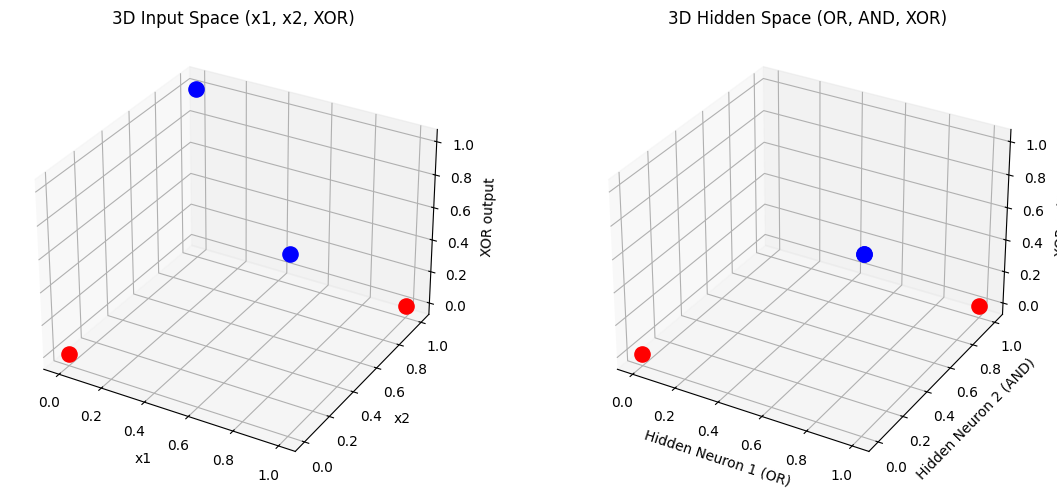

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1= np.array([0,0,1,1])
x2= np.array([0,1,0,1])
x3=[] # OR
x4=[] # AND
x5=[] # NOT AND
xor=[]

# For OR logic

# for val1, val2 in zip(x1, x2):
#   if val1==1 or val2==1:
#     x3.append(1)
#   else:
#     x3.append(0)
# print(x3)

# x3= np.logical_or(x1,x2).astype(int)
# print(x3)

x3= x1 | x2
print("OR:",x3)

# For AND Logic

# for val1, val2 in zip(x1, x2):
#     if val1 == 1 and val2 == 1:
#         x3.append(1)
#     else:
#         x3.append(0)
# print("AND:",x4)

# x4 = np.logical_and(x1, x2).astype(int)
# print("AND:",x4)

x4 = x1 & x2
print("AND:",x4)

# For NOT
# for val in x4:
#     if val == 0:
#         x5.append(1)
#     else:
#         x5.append(0)
# print("NOT of X4: ",x5)

# x5 = np.logical_not(x4).astype(int)
# print("NOT of X4: ",x5)

x5= 1- x4
print("NOT of X4: ",x5)

# For XOR

xor= x3 & x5
print("XOR: ",xor)

labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
index = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(14,5))

plt.bar(index - 2*width, x1, width, label='x1')
plt.bar(index - width, x2, width, label='x2')
plt.bar(index, x3, width, label='OR')
plt.bar(index + width, x4, width, label='AND')
plt.bar(index + 2*width, xor, width, label='XOR')

plt.xticks(index, labels)
plt.ylim(0, 1.2)
plt.ylabel('Value')
plt.title('XOR Construction Using Hidden Logic')
plt.legend()
plt.grid(axis='y', linestyle='dotted')
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for i in range(len(x1)):
    if xor[i] == 0:
        plt.scatter(x1[i], x2[i], color='red', s=120)
    else:
        plt.scatter(x1[i], x2[i], color='blue', s=120)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Original XOR Input Space")
plt.xticks([0,1])
plt.yticks([0,1])
plt.grid(True)


plt.subplot(1,2,2)

for i in range(len(x3)):
    if xor[i] == 0:
        plt.scatter(x3[i], x4[i], color='red', s=120)
    else:
        plt.scatter(x3[i], x4[i], color='blue', s=120)

plt.xlabel("Hidden Neuron 1 (OR)")
plt.ylabel("Hidden Neuron 2 (AND)")
plt.title("Transformed Space After Hidden Layer")
plt.xticks([0,1])
plt.yticks([0,1])
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')

for i in range(len(x1)):
    if xor[i] == 0:
        ax.scatter(x1[i], x2[i], xor[i], color='red', s=120)
    else:
        ax.scatter(x1[i], x2[i], xor[i], color='blue', s=120)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("XOR output")
ax.set_title("3D Input Space (x1, x2, XOR)")

ax2 = fig.add_subplot(122, projection='3d')

for i in range(len(x3)):
    if xor[i] == 0:
        ax2.scatter(x3[i], x4[i], xor[i], color='red', s=120)
    else:
        ax2.scatter(x3[i], x4[i], xor[i], color='blue', s=120)

ax2.set_xlabel("Hidden Neuron 1 (OR)")
ax2.set_ylabel("Hidden Neuron 2 (AND)")
ax2.set_zlabel("XOR output")
ax2.set_title("3D Hidden Space (OR, AND, XOR)")

plt.tight_layout()
plt.show()

## Add Weight

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1= np.array([0,0,1,1])
x2= np.array([0,1,0,1])
x3=[] # OR
x4=[] # AND
x5=[] # NOT AND
xor=[]

x3= x1 | x2
print("OR:",x3)

x4 = x1 & x2
print("AND:",x4)

x5= 1- x4
print("NOT of X4: ",x5)

# For XOR

xor= x3 & x5
print("XOR: ",xor)

# Add Weight
w1= 1
w2= -1
b=0.5

predicted_output= w1*x3 + w2*x4 + b
z= predicted_output
print("Predicted Output: ",predicted_output)

sigmoid_of_z= 1/ (1+ np.exp(-z))
print("Sigmoid of Z: ",sigmoid_of_z)

loss= nn.MSELoss()
print(loss(torch.tensor(xor), torch.tensor(predicted_output)))
print(loss(torch.tensor(xor), torch.tensor(sigmoid_of_z)))

OR: [0 1 1 1]
AND: [0 0 0 1]
NOT of X4:  [1 1 1 0]
XOR:  [0 1 1 0]
Predicted Output:  [0.5 1.5 1.5 0.5]
Sigmoid of Z:  [0.62245933 0.81757448 0.81757448 0.62245933]
tensor(0.2500, dtype=torch.float64)
tensor(0.2104, dtype=torch.float64)


## Minimize the Weight
---

-- By using Backpropagation.


Predicted Output:  tensor([0.5000, 1.5000, 1.5000, 0.5000], grad_fn=<AddBackward0>)
Sigmoid of Z:  tensor([0.6225, 0.8176, 0.8176, 0.6225], grad_fn=<SigmoidBackward0>)
Loss calculated by Sigmoid:  tensor(0.2104, grad_fn=<MseLossBackward0>)
Loss: 0.2103673666715622
dw1: 0.04593200236558914
dw2: 0.07314012944698334
db : 0.11907213181257248


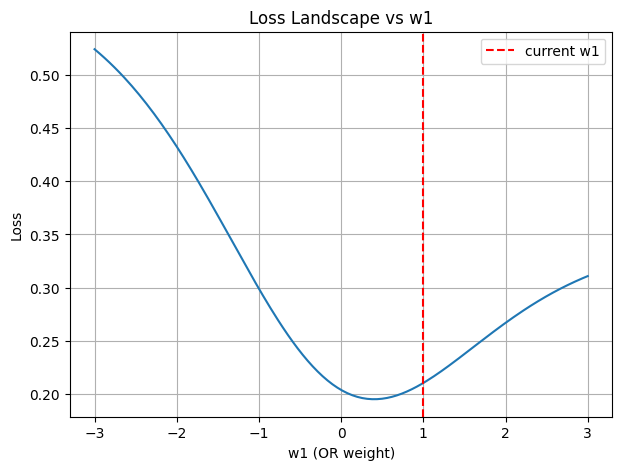

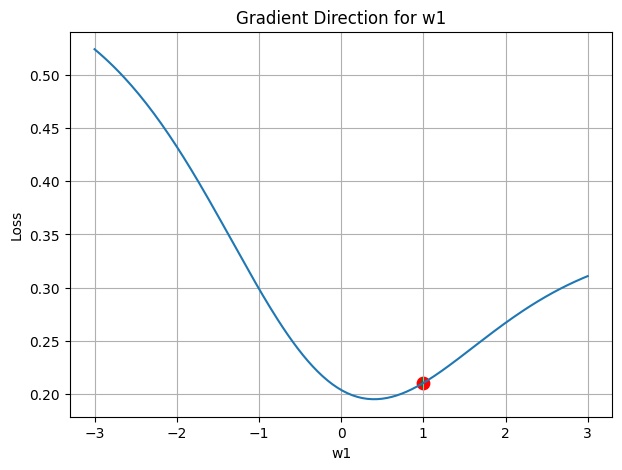

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Inputs (fixed)
x3 = torch.tensor([0,1,1,1], dtype=torch.float32)  # OR
x4 = torch.tensor([0,0,0,1], dtype=torch.float32)  # AND
xor = torch.tensor([0,1,1,0], dtype=torch.float32)  # XOR

# Trainable parameters
w1 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(-1.0, requires_grad=True)
b  = torch.tensor(0.5, requires_grad=True)

z = w1*x3 + w2*x4 + b
print("Predicted Output: ",z)

sigmoid_of_z = torch.sigmoid(z)
print("Sigmoid of Z: ",sigmoid_of_z)

loss_fn = nn.MSELoss()
loss = loss_fn(sigmoid_of_z, xor)
print("Loss calculated by Sigmoid: ",loss)

loss.backward()

print("Loss:", loss.item())
print("dw1:", w1.grad.item())
print("dw2:", w2.grad.item())
print("db :", b.grad.item())

w1_vals = np.linspace(-3, 3, 200)
loss_vals = []

for val in w1_vals:
    z = val*x3.numpy() + w2.item()*x4.numpy() + b.item()
    y = 1 / (1 + np.exp(-z))
    loss_vals.append(np.mean((y - xor.numpy())**2))

plt.figure(figsize=(7,5))
plt.plot(w1_vals, loss_vals)
plt.axvline(w1.item(), color='red', linestyle='--', label='current w1')
plt.xlabel("w1 (OR weight)")
plt.ylabel("Loss")
plt.title("Loss Landscape vs w1")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(w1_vals, loss_vals)
plt.scatter(w1.item(), loss.item(), color='red', s=80)
plt.arrow(
    w1.item(), loss.item(),
    -w1.grad.item()*0.1, 0,
    head_width=0.01, color='green'
)
plt.xlabel("w1")
plt.ylabel("Loss")
plt.title("Gradient Direction for w1")
plt.grid(True)
plt.show()


## Training Loop
---

-- We computed gradients once

-- We looked at them

-- We update weights

-- We repeat many times (epochs)

Epoch 0 | Loss 0.2104
Epoch 100 | Loss 0.1268
Epoch 200 | Loss 0.1021
Epoch 300 | Loss 0.0842
Epoch 400 | Loss 0.0707
Epoch 500 | Loss 0.0604
Epoch 600 | Loss 0.0523
Epoch 700 | Loss 0.0459
Epoch 800 | Loss 0.0408
Epoch 900 | Loss 0.0365


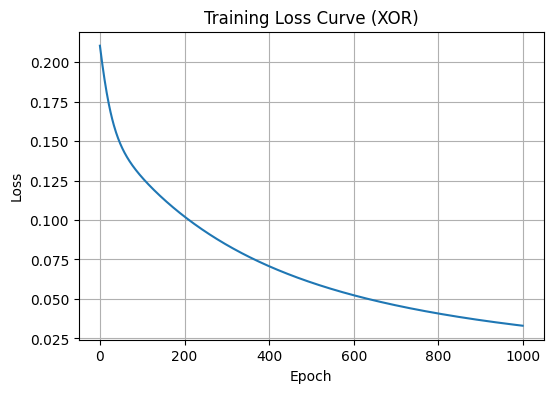

Final weights:
w1: 2.857672691345215
w2: -3.2355051040649414
b : -1.258202075958252

Final predictions:
Predicted XOR:  tensor([0., 1., 1., 0.], grad_fn=<RoundBackward0>)
True XOR:  tensor([0., 1., 1., 0.])


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Hidden layer outputs (fixed logic)
x3 = torch.tensor([0,1,1,1], dtype=torch.float32)  # OR
x4 = torch.tensor([0,0,0,1], dtype=torch.float32)  # AND
xor = torch.tensor([0,1,1,0], dtype=torch.float32)  # XOR

# Trainable parameters
w1 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(-1.0, requires_grad=True)
b  = torch.tensor(0.5, requires_grad=True)

lr = 0.1
epochs = 1000
loss_fn = nn.MSELoss()

loss_history = []

for epoch in range(epochs):

    # -------- Forward pass --------
    z = w1*x3 + w2*x4 + b
    sigmoid_of_z = torch.sigmoid(z)
    loss = loss_fn(sigmoid_of_z, xor)

    # -------- Backward pass --------
    loss.backward()

    # -------- Gradient Descent --------
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        b  -= lr * b.grad

    # -------- Reset gradients --------
    w1.grad.zero_()
    w2.grad.zero_()
    b.grad.zero_()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss {loss.item():.4f}")

plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (XOR)")
plt.grid(True)
plt.show()

print("Final weights:")
print("w1:", w1.item())
print("w2:", w2.item())
print("b :", b.item())

print("\nFinal predictions:")
print("Predicted XOR: ",torch.round(sigmoid_of_z))
print("True XOR: ", xor)



## Decison Boundry Evolutions

---

-- In this step, I do some mistake. So, this code(Some lines) are wriiten by LLM.


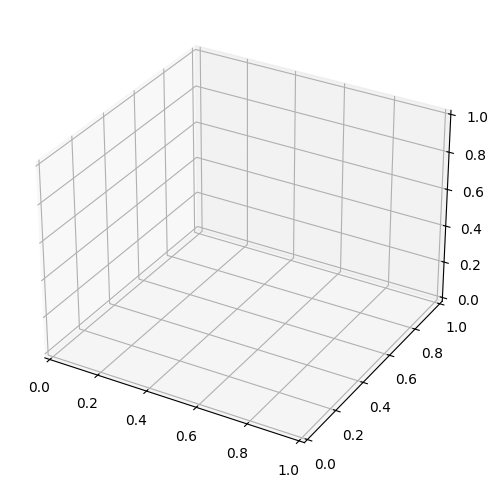

In [ ]:
# STEP 11 (Advanced): 3D Decision Boundary Evolution with Animation
# This code creates a RUNNING (motion) visualization of XOR learning in 3D

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# --------------------
# XOR dataset
# --------------------
X = torch.tensor([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
])

y = torch.tensor([[0.], [1.], [1.], [0.]])

# --------------------
# Simple XOR Network
# --------------------
class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.h = nn.Linear(2, 2)
        self.o = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.h(x))
        x = torch.sigmoid(self.o(x))
        return x

model = XORNet()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# --------------------
# Create grid for surface
# --------------------
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 60),
                     np.linspace(-0.2, 1.2, 60))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# --------------------
# Matplotlib 3D setup
# --------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.clear()

    # Train for one step per frame
    optimizer.zero_grad()
    preds = model(X)
    loss = loss_fn(preds, y)
    loss.backward()
    optimizer.step()

    # Predict surface
    with torch.no_grad():
        zz = model(grid).reshape(xx.shape).numpy()

    # Plot decision surface
    ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.7)

    # Plot XOR points
    for i in range(len(X)):
        color = 'blue' if y[i] == 1 else 'red'
        ax.scatter(X[i,0], X[i,1], y[i], color=color, s=80)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("Output")
    ax.set_title(f"XOR Decision Surface Evolution | Frame {frame}")

# --------------------
# Animate
# --------------------
ani = animation.FuncAnimation(fig, update, frames=120, interval=120)

plt.show()


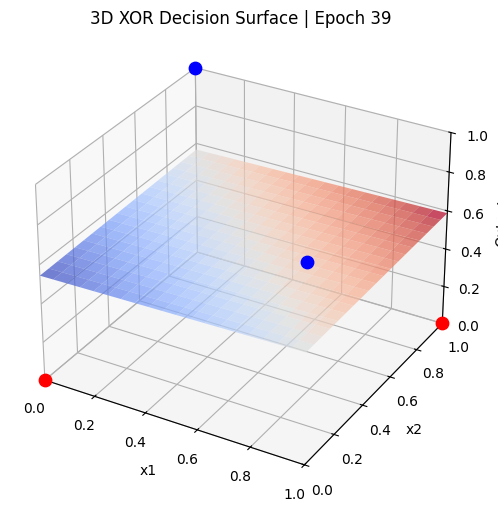

In [ ]:
# STEP 11 (Advanced): 3D Decision Boundary Evolution with Animation (Retry)

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# XOR dataset
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])

# XOR Network
class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.h = nn.Linear(2, 2)
        self.o = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.h(x))
        return torch.sigmoid(self.o(x))

model = XORNet()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Grid
xx, yy = np.meshgrid(np.linspace(0, 1, 20),
                     np.linspace(0, 1, 20))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Plot setup

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Fix axis limits ONCE (important)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

def update(frame):
    ax.cla()   # clear axes (not figure)

    # Train step
    optimizer.zero_grad()
    preds = model(X)
    loss = loss_fn(preds, y)
    loss.backward()
    optimizer.step()

    # Re-set limits after clear
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    # Surface prediction
    with torch.no_grad():
        zz = model(grid).reshape(xx.shape).numpy()

    surface = ax.plot_surface(
        xx, yy, zz,
        cmap='coolwarm',
        alpha=0.7
    )

    # Plot XOR points
    for i in range(4):
        color = 'blue' if y[i] == 1 else 'red'
        ax.scatter(
            X[i,0].item(),
            X[i,1].item(),
            y[i].item(),
            color=color,
            s=80
        )

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("Output")
    ax.set_title(f"3D XOR Decision Surface | Epoch {frame}")

    return surface,  # <-- IMPORTANT

# 🔥 THIS is the key fix
anim = animation.FuncAnimation(
    fig,
    update,
    frames=40,
    interval=120,
    blit=False
)
HTML(anim.to_jshtml())
plt.show()
